## Grade Prediction (Using Supervised ML)
#### The Sparks Foundation
Graduate Rotational Internship Program - Data Science and Business Analytics Intern
#### Completed by: Huda Hashmi

Let's start off by importing the libraries we will be using.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

And then let's take a look at our data.

In [2]:
# Reading date from remote link

url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's create a scatterplot of our data and see if we can visualize a relationship between the variables.

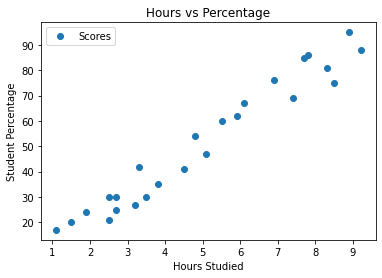

In [3]:
# Plotting the distribution of scores
data.plot(x="Hours", y="Scores", style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Student Percentage")
plt.show()

**From the above graph, it is clear that there is a positive linear relationship between the number of hours studied and the percentage students recieived.**

### Preparing the Data
The next step is to divide the data into "attributes" and labels."
An **attribute** (often called a feature) captures the basic characteristics of an object. In our data, each row represents a student object, and the columns are characteristics (attributes) of that students. This is the "input" to our model.
A **label** is the thing we're predicitng - the y variable in simple linear regresssion.

In [4]:
x = data.iloc[:, 0].values.reshape(-1, 1)  # .values converts it into a numpy array
y = data.iloc[:, -1].values.reshape(-1, 1)  

Now let's **split** the data into **training** and **test** sets to ensure unbiased evaluation of our model. We can do this by importing Scikit-Learn's built in train_test_split() method.

In [5]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2 , random_state = 0)

x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

### Training the Algorithm
It's finally time to train our algorithm into developing a relationship between the given variables - using the training data we created above. 

In [6]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Training complete.")

Training complete.


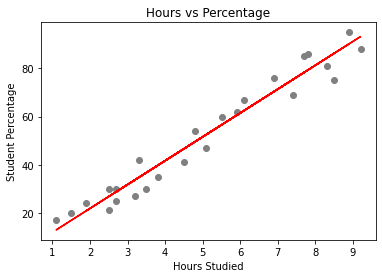

In [7]:
# Plotting the regression line
line=regressor.predict(x_train)

plt.scatter(x,y, c="grey")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Student Percentage")
plt.plot(x_train,line, c="red")
plt.show()

### Making Predictions
We can now make some predictions using our trained algorithm.

In [8]:
y_pred=regressor.predict(x_test)

# Convert the returned 2D-arrays into 1D-arrays
x_test=x_test.flatten()
y_pred=y_pred.flatten()

# Create a data frame
df =pd.DataFrame({"Hours":x_test, "Predicted":y_pred})  
df 

,Hours,Predicted
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [9]:
# Comparing Actual vs Predicted scores
y_test=y_test.flatten()
df=pd.DataFrame({"Hours":x_test, "Predicted":y_pred, "Actual":y_test})  
df 

,Hours,Predicted,Actual
0,1.5,16.884145,20
1,3.2,33.732261,27
2,7.4,75.357018,69
3,2.5,26.794801,30
4,5.9,60.491033,62


We can use our model to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [10]:
hours=9.25
y_pred_given=float(regressor.predict([[hours]]))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(y_pred_given))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Determining Error
The final step is to evaluate the error in our model. This will help us observe the disrepancy between the actual and predicted results. 

In [11]:
from sklearn import metrics
error=metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",error)

Mean Absolute Error: 4.183859899002975


This is the end of our single-variable linear regression task!